# Repte#4 - Models de classificació

✅ Objectius

    Comprendre el conjunt de dades i netejar-lo (si cal).

    Construir models de classificació per predir si el tipus de càncer és maligne o benigne, variable "diagnosi" 0 benigne i 1 maligne.

    També ajustar els hiperparàmetres i comparar les mètriques davaluació de diversos algorismes de classificació.


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#classification models
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# feature scaling and model train & test
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

#classification metrics
from imblearn.metrics import sensitivity_score, specificity_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import classification_report
from sklearn import metrics

#hyperparameters setting and cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


### Description of the data set

**Features**: The datasets contain 30 features, which are different measurements of the tumors. 455 records in the train dataset and 114 records in the test dataset

**Target**: The target variable to predict is "diagnosis", where "0" is benign tumor and "1" is malignant tumor


In [105]:
test_data = pd.read_csv('test.csv')

In [48]:
test_data.head().T

,0,1,2,3,4
radius_mean,14.020000,11.200000,13.470000,25.730000,10.860000
texture_mean,15.660000,29.370000,14.060000,17.460000,21.480000
perimeter_mean,89.590000,70.670000,87.320000,174.200000,68.510000
area_mean,606.500000,386.000000,546.300000,2010.000000,360.500000
smoothness_mean,0.079660,0.074490,0.107100,0.114900,0.074310
compactness_mean,0.055810,0.035580,0.115500,0.236300,0.042270
concavity_mean,0.020870,0.000000,0.057860,0.336800,0.000000
concave points_mean,0.026520,0.000000,0.052660,0.191300,0.000000
symmetry_mean,0.158900,0.106000,0.177900,0.195600,0.166100
fractal_dimension_mean,0.055860,0.055020,0.066390,0.061210,0.059480


In [49]:
test_data.shape

(114, 30)

In [50]:
raw_data = pd.read_csv('train(1).csv')

In [51]:
raw_data.head().T

,0,1,2,3,4
diagnosis,0.000000,0.000000,0.000000,1.000000,1.000000
radius_mean,10.710000,13.640000,11.710000,15.300000,14.450000
texture_mean,20.390000,16.340000,17.190000,25.270000,20.220000
perimeter_mean,69.500000,87.210000,74.680000,102.400000,94.490000
area_mean,344.900000,571.800000,420.300000,732.400000,642.700000
smoothness_mean,0.108200,0.076850,0.097740,0.108200,0.098720
compactness_mean,0.128900,0.060590,0.061410,0.169700,0.120600
concavity_mean,0.084480,0.018570,0.038090,0.168300,0.118000
concave points_mean,0.028670,0.017230,0.032390,0.087510,0.059800
symmetry_mean,0.166800,0.135300,0.151600,0.192600,0.195000


In [52]:
raw_data.shape

(455, 31)

### Exploratory Analysis of the dataset 

+ **Check null values**

    There are no null values

In [53]:
raw_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

+ **Type of data and basic statistics**

    1. All the variables are numerical and continuous (float numbers).
    2. For many variables the mean and the median diverge, which indicates the presence of skew and/or outliers
    3. Regarding the target variable the dataset is balanced 63% negatives - 37% positives


In [54]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                455 non-null    int64  
 1   radius_mean              455 non-null    float64
 2   texture_mean             455 non-null    float64
 3   perimeter_mean           455 non-null    float64
 4   area_mean                455 non-null    float64
 5   smoothness_mean          455 non-null    float64
 6   compactness_mean         455 non-null    float64
 7   concavity_mean           455 non-null    float64
 8   concave points_mean      455 non-null    float64
 9   symmetry_mean            455 non-null    float64
 10  fractal_dimension_mean   455 non-null    float64
 11  radius_se                455 non-null    float64
 12  texture_se               455 non-null    float64
 13  perimeter_se             455 non-null    float64
 14  area_se                  4

In [55]:
round(raw_data.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
diagnosis,455.0,0.374,0.484,0.000,0.000,0.000,1.000,1.000
radius_mean,455.0,14.139,3.626,6.981,11.705,13.300,15.740,28.110
texture_mean,455.0,19.306,4.267,9.710,16.210,18.890,21.795,39.280
perimeter_mean,455.0,92.086,24.998,43.790,75.015,85.980,103.650,188.500
area_mean,455.0,657.830,363.537,143.500,419.250,546.400,777.250,2501.000
smoothness_mean,455.0,0.097,0.014,0.053,0.087,0.097,0.106,0.163
compactness_mean,455.0,0.106,0.053,0.019,0.067,0.095,0.130,0.345
concavity_mean,455.0,0.091,0.081,0.000,0.030,0.064,0.132,0.427
concave points_mean,455.0,0.050,0.039,0.000,0.021,0.034,0.074,0.201
symmetry_mean,455.0,0.181,0.027,0.117,0.162,0.180,0.196,0.304


In [56]:
raw_data.diagnosis.value_counts(normalize=True)

0    0.626374
1    0.373626
Name: diagnosis, dtype: float64

In [57]:
raw_data.diagnosis.value_counts()

0    285
1    170
Name: diagnosis, dtype: int64

+ **Distribution of the predictor variables**

    Some have normal distribution, but most of them are right skewed and have outliers.

In [58]:
features = list(raw_data.columns)
features.remove('diagnosis')

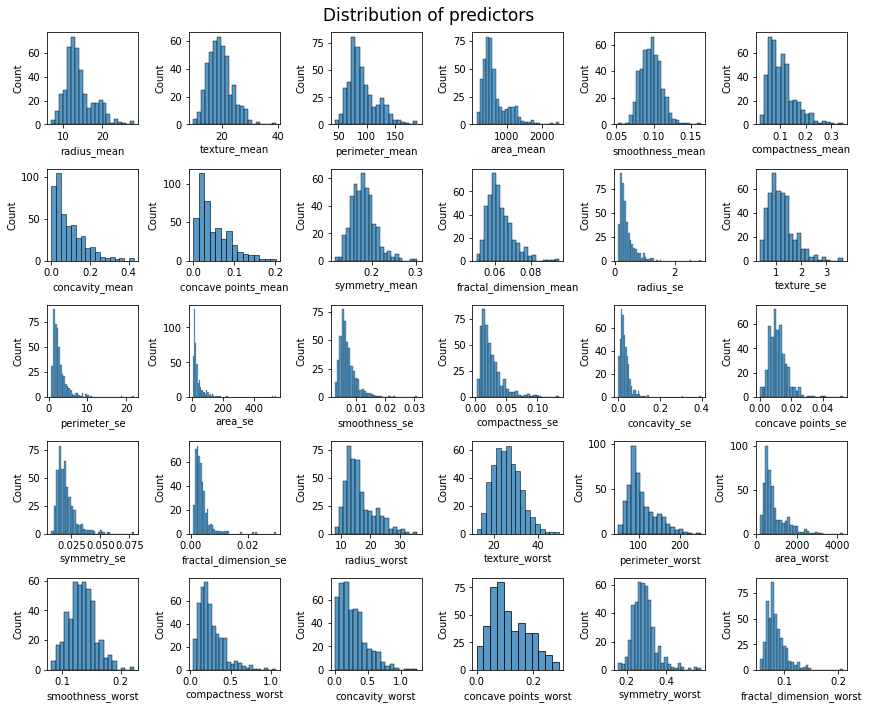

In [59]:
# plot the distribution of all the predictor variables: 

f, axes = plt.subplots(5,6, figsize = (12, 10))
f.suptitle('Distribution of predictors', fontsize = 17 )

for i, ax in enumerate(axes.flatten()): 
    sns.histplot(raw_data[features].iloc[: , i], ax = ax, kde_kws=dict(linewidth=3))
plt.tight_layout(); 

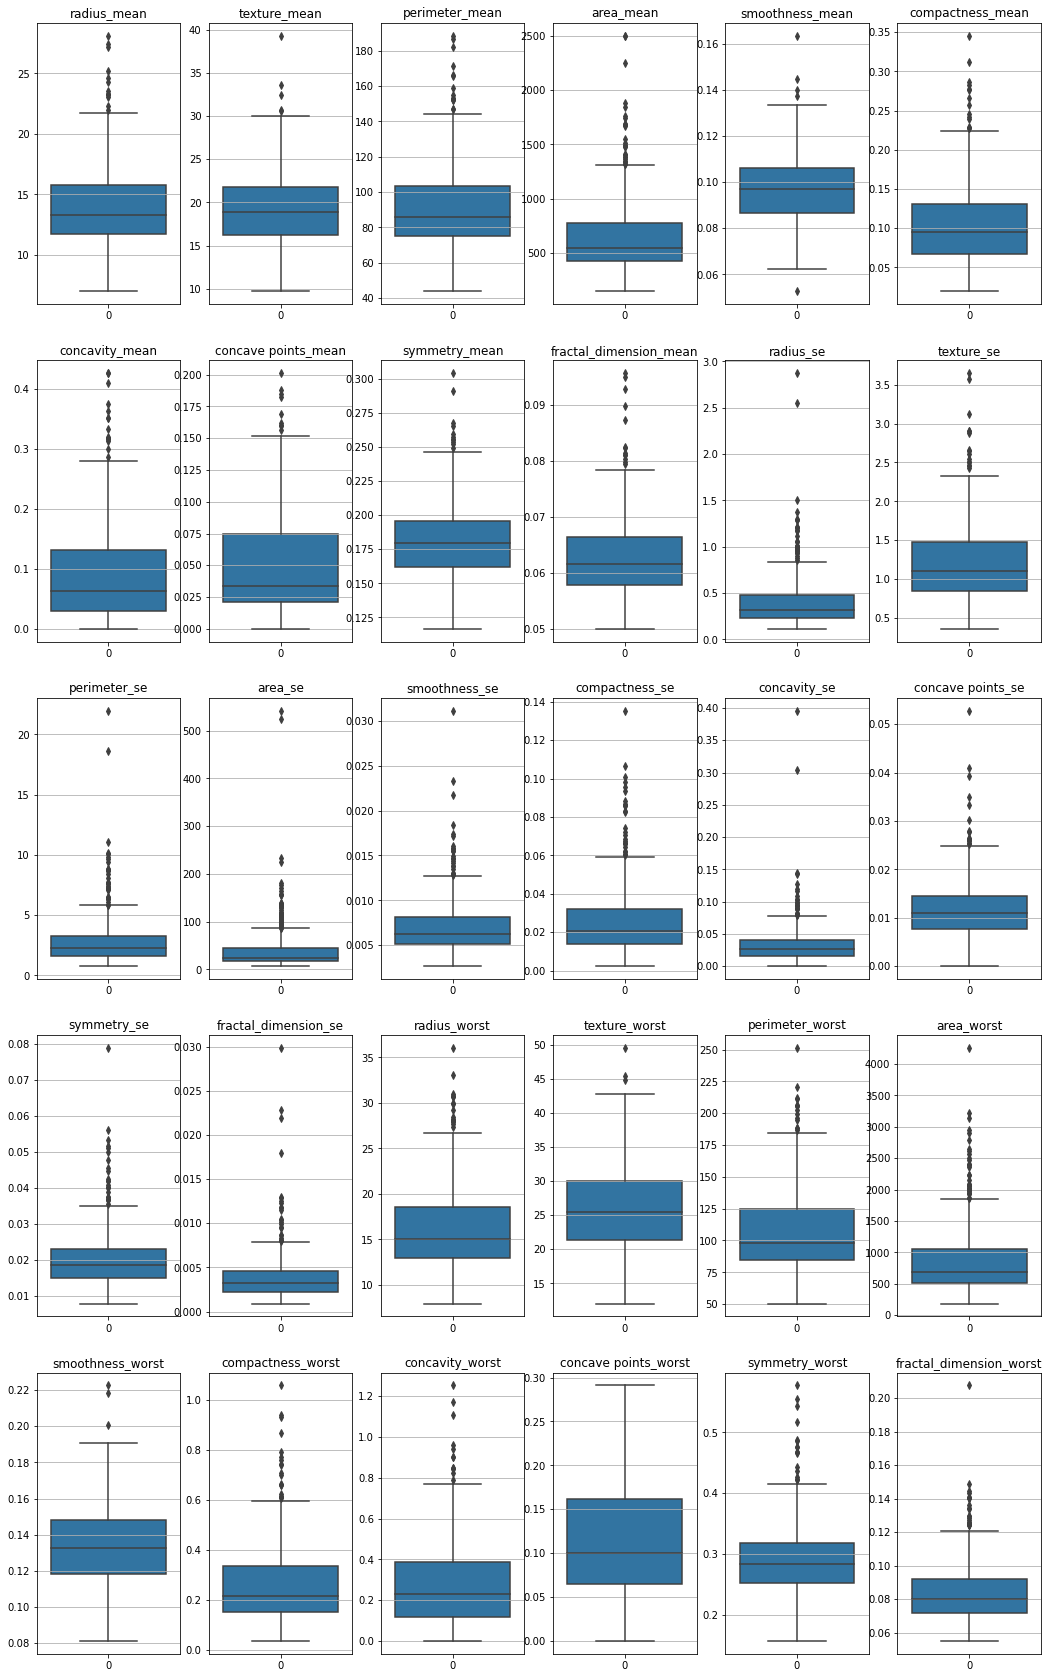

In [60]:
plt.figure(figsize=(18,30))
for i in list(range(1,31)):
    plt.subplot(5,6,i)
    sns.boxplot(data=raw_data[features].iloc[: , i-1], orient='v');
    plt.grid(axis = 'y')
    plt.title(features[i-1])

+ **Evaluation of correlation among features**

    1. There is a very high correlation (>0.95) between radius, perimeter, and area for the *_mean*, the *_se* and the *_worst*. This three variables are linked by geometry.
    2. There is also a very high correlation between radius_mean and radius_worst.

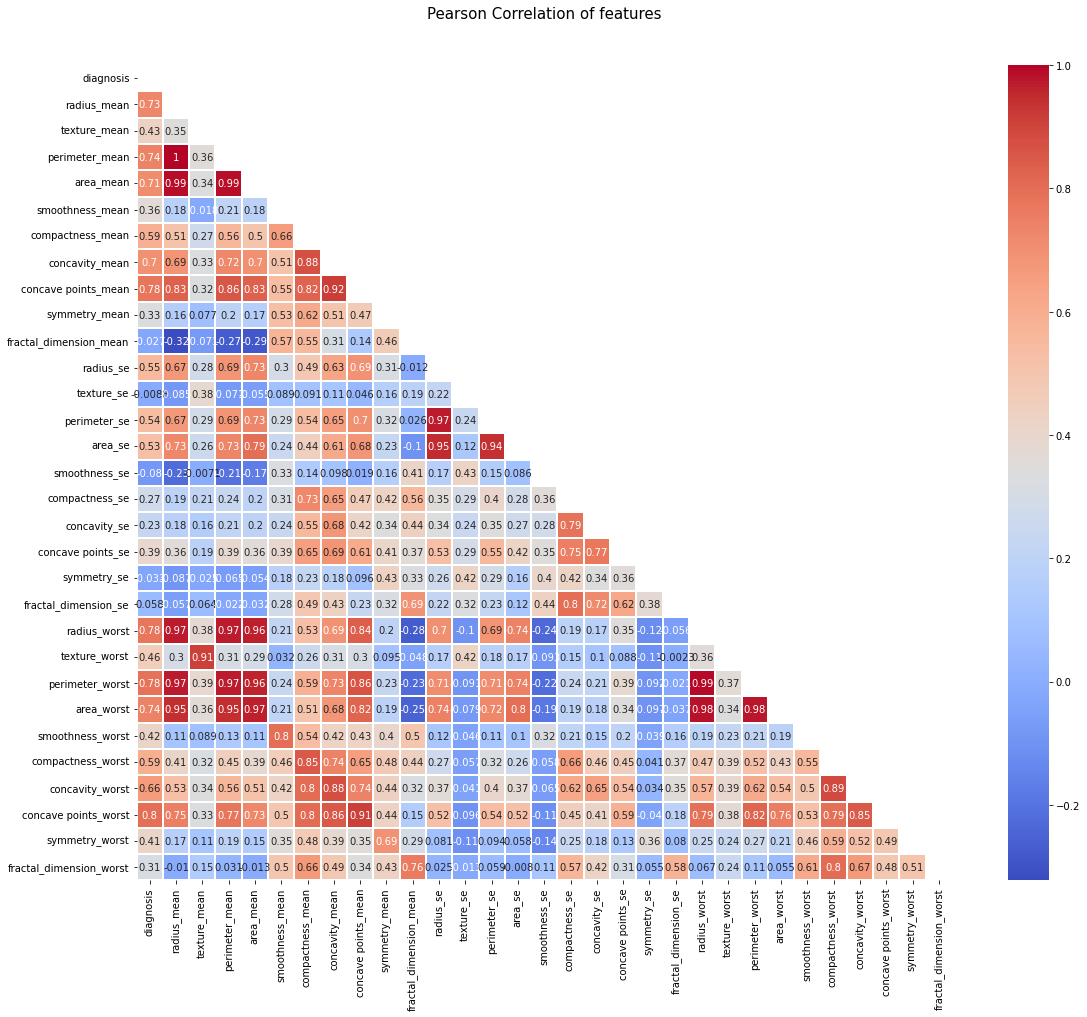

In [61]:
plt.figure(figsize=(20,15))
matrix = np.triu(raw_data.astype(float).corr())
plt.title('Pearson Correlation of features', y=1.05, size = 15)
sns.heatmap(raw_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square = True, cmap = 'coolwarm', 
           linecolor = 'white', annot = True, mask = matrix)
plt.show()

+ **Feature engineering and feature scaling**

    1. I drop perimeter, and area for the *_mean*, the *_se* and the *_worst* since they are redundant.
    2. I will scalate the remaining variable with RobustScaler, which is convenient where there are outliers as in this case.

In [62]:
X = raw_data.iloc[:,1:].copy()
X.drop(['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'perimeter_worst', 'area_worst'], axis=1, inplace=True)
y = raw_data.iloc[:,:1].copy()

In [63]:
X = np.array(X)
y = np.array(y)

In [64]:
X.shape

(455, 24)

In [65]:
y.shape

(455, 1)

In [66]:
robust = RobustScaler()

# fit_transform to scalate train data 
X = robust.fit_transform(X)

### Model selection

    I will test several classification models with a cross_validation score, to make a first selection.
    In our case, the most relevant metrics are the overall accuracy and the recall. This one is specially important because we want to avoid False Negatives.

In [67]:
models = [
('Logistic Regression', LogisticRegression()),
('XGBoost', xgb.XGBClassifier()),
('Decision Tree', DecisionTreeClassifier()),
('AdaBoost', AdaBoostClassifier()),
('Kneighbors', KNeighborsClassifier()),
('SVC', SVC())
]

In [68]:
scores = {}
for name, classifier in models:
    indicators = ['accuracy', 'recall', 'f1']
    results = []
    for i in indicators:
        cv = cross_val_score(classifier, X, y.ravel(), scoring = i)
        results.append(np.mean(cv))
        results.append(np.std(cv))
    scores[name] = results
summary = pd.DataFrame(scores, index=['accuracy mean', 'accuracy std', 'recall mean', 'recall std', 'f1 mean', 'f1 std'])
summary


,Logistic Regression,XGBoost,Decision Tree,AdaBoost,Kneighbors,SVC
accuracy mean,0.967033,0.960440,0.920879,0.960440,0.953846,0.964835
accuracy std,0.009829,0.014906,0.037038,0.008791,0.004396,0.017582
recall mean,0.941176,0.917647,0.888235,0.923529,0.888235,0.941176
recall std,0.018602,0.039019,0.068093,0.023529,0.011765,0.041595
f1 mean,0.955216,0.945135,0.925195,0.945796,0.934994,0.952038
f1 std,0.013367,0.021340,0.033245,0.011855,0.006004,0.024487


Based in the results above I will pursue the exercise with Logistic Regression and SVC

### Models Building

+ **Split the data, train & test models**

In [69]:
# choose test size of 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [70]:
y_test.shape

(91, 1)

+ **Logistic Regression**

In [71]:
#instantiate the model
model1 = LogisticRegression(random_state= 42)

#fit to train the model
model1.fit(X_train, y_train.ravel())

#prediction
y_pred_1 = model1.predict(X_test)

In [72]:
confusion = confusion_matrix(y_test, y_pred_1)
confusion

array([[56,  0],
       [ 1, 34]], dtype=int64)

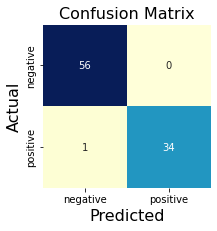

In [73]:
labels = ['negative', 'positive']
plt.figure(figsize= (3,3))
sns.heatmap(pd.DataFrame(confusion), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Confusion Matrix', fontsize = 16)
plt.ylabel('Actual',fontsize = 16 )
plt.xlabel('Predicted', fontsize = 16);

In [74]:
accuracy_score(y_test, y_pred_1)

0.989010989010989

In [75]:
recall_score(y_test, y_pred_1)

0.9714285714285714

+ **Parameter Setting for Logistic Regression**

In [76]:
model1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [77]:
#dictionary of search space
space = dict()
space['max_iter'] = [100, 200]
space['solver'] = ['liblinear', 'lbfgs']

search = GridSearchCV(LogisticRegression(), space)

result = search.fit(X_train, y_train.ravel())

print('Best Hyperparameters: ', result.best_params_)

Best Hyperparameters:  {'max_iter': 100, 'solver': 'liblinear'}


The train of the adjusted model can be done on the complete X, we can check the prediction versus the y:

In [78]:
#instantiate the model
model1_adj = LogisticRegression(solver = 'liblinear', random_state= 42)

#fit to train the model
model1_adj.fit(X, y.ravel())

#prediction
y_adj_pred_1 = model1_adj.predict(X)

In [79]:
confusion = confusion_matrix(y, y_adj_pred_1)
confusion

array([[283,   2],
       [  4, 166]], dtype=int64)

+ **SVC**

In [80]:
#instantiate the model
model2 = SVC(random_state= 42)

#fit to train the model
model2.fit(X_train, y_train.ravel())

#prediction
y_pred_2 = model2.predict(X_test)

In [81]:
confusion = confusion_matrix(y_test, y_pred_2)
confusion

array([[55,  1],
       [ 3, 32]], dtype=int64)

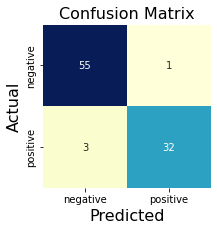

In [82]:
labels = ['negative', 'positive']
plt.figure(figsize= (3,3))
sns.heatmap(pd.DataFrame(confusion), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Confusion Matrix', fontsize = 16)
plt.ylabel('Actual',fontsize = 16 )
plt.xlabel('Predicted', fontsize = 16);

In [83]:
accuracy_score(y_test, y_pred_2)

0.9560439560439561

In [84]:
recall_score(y_test, y_pred_2)

0.9142857142857143

+ **Parameter Setting for SVC**

In [85]:
model2.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [86]:
#dictionary of search space
space = dict()
space['C'] = [1.0, 2.0, 5.0]
space['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']

search = GridSearchCV(SVC(), space)

result = search.fit(X_train, y_train.ravel())

print('Best Hyperparameters: ', result.best_params_)

Best Hyperparameters:  {'C': 2.0, 'kernel': 'rbf'}


In [87]:
#instantiate the model
model2_adj = SVC(C = 2.0, random_state= 42)

#fit to train the model
model2_adj.fit(X, y.ravel())

#prediction
y_adj_pred_2 = model2_adj.predict(X)

In [88]:
confusion = confusion_matrix(y, y_adj_pred_2)
confusion

array([[285,   0],
       [  5, 165]], dtype=int64)

### Final selection of the model

In [89]:
models = [
('Logistic Regression Adj', model1_adj),
('SVC Adj', model2_adj)
]

scores = {}
for name, classifier in models:
    indicators = ['accuracy', 'recall', 'f1']
    results = []
    for i in indicators:
        cv = cross_val_score(classifier, X, y.ravel(), scoring = i)
        results.append(np.mean(cv))
        results.append(np.std(cv))
    scores[name] = results
summary = pd.DataFrame(scores, index=['accuracy mean', 'accuracy std', 'recall mean', 'recall std', 'f1 mean', 'f1 std'])
summary


,Logistic Regression Adj,SVC Adj
accuracy mean,0.969231,0.969231
accuracy std,0.018906,0.014579
recall mean,0.952941,0.941176
recall std,0.029994,0.041595
f1 mean,0.958472,0.957730
f1 std,0.025599,0.020650


Adjusted **Logistic Regression** achieves better recall (with lower standard deviation). Despite the f1 shows a higher std with the Logistic Regression, I still choose this model because seems to deliver the better recall.

### Train final model and make prediction

In [106]:
#instantiate the model
mymodel = LogisticRegression(solver = 'liblinear')

#fit to train the model
mymodel.fit(X, y.ravel())

#feature engineering and feature scaling of the test_data
test_data.drop(['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'perimeter_worst', 'area_worst'], axis=1, inplace=True)
test_data = robust.fit_transform(test_data)

#use the model to predict on the test data
prediction = mymodel.predict(test_data)


In [107]:
print(prediction)

[0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1
 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0
 0 1 0]


In [108]:
prediction.shape

(114,)

In [109]:
dataframe = pd.DataFrame({ 'diagnosis' : prediction})

In [110]:
dataframe

,diagnosis
0,0
1,0
2,0
3,1
4,0
...,...
109,0
110,0
111,0
112,1


In [111]:
dataframe.to_csv('predictions.csv')